In [5]:
#loading the neccessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\twitter_archive_master1.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Research questions
Before we encounter the questions, there are some limitations to our dataset:
    -  The algorithim that has been used to generate names for our dataset may impact our
       analysis, since some of the dogs do have the names in their tweets and it has not 
       correctly named them. Also some of the tweets are from two dogs, but it has only 
       picked one dog name.
    
we need to answer the following questions from our dataset:
    
    1. Which are the most common dog names in our dataset?    
    2. a. Which dog stage is most retweed on average?
       b.Does top retweed dog stages happen to be most liked?        
    3. Do dogs that happen to have high ratings happen to be most liked?

### 1 Which are the most common dog names?

###### since our datasets contains unnamed dogs we need to remove them, to remain with dogs that have only names.

In [7]:
df_name = df[df["name"] != "Unnamed"]

creating data for most common dogs by taking the top 15 dogs in our dataset

In [8]:
common = df_name.name.value_counts().head(15)
common

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        7
Daisy       7
Toby        7
Koda        6
Bella       6
Jax         6
Stanley     6
Name: name, dtype: int64

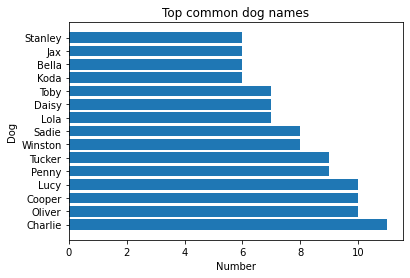

In [9]:
figsize=(16,16)
plt.barh(common.index,common)
plt.title('Top common dog names')
plt.xlabel('Number')
plt.ylabel('Dog');

###### Charlie can be seen as to be the most common name followed by Oliver, Cooper and Lucy.

### 2. a. Which dog stage is most retweed on average?
###     b.Does top retweed dog stages happen to be most liked

**Since our dataset contains ungrouped dogs, we need to get rid of ungrouped dogs from our analysis.**

In [10]:
df_stage = df[df["stage"] != "ungrouped"]

In [11]:
retweet = df_stage.groupby('stage')[['favorite_count','retweet_count']].mean()#['retweet_count']
retweet.reset_index(inplace=True)

In [12]:
retweet

,stage,favorite_count,retweet_count
0,doggo,19356.380952,7125.698413
1,"doggo, floofer",17169.000000,3433.000000
2,"doggo, pupper",12533.111111,4083.444444
3,"doggo, puppo",47844.000000,19196.000000
4,floofer,13206.000000,4968.714286
5,pupper,7197.738916,2363.581281
6,puppo,21582.090909,6473.954545


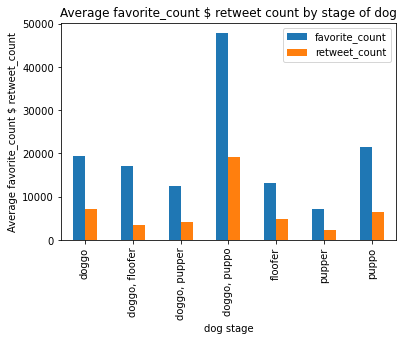

In [13]:
locations = [1, 2, 3, 4]
retweet.plot(x="stage", y=["favorite_count", 'retweet_count'], kind='bar')
plt.title('Average favorite_count $ retweet count by stage of dog')
plt.xlabel('dog stage')
plt.ylabel('Average favorite_count $ retweet_count');

It can be noted that dog stages with higher retweet counts also happen to be the most liked dogs.

### 3. Do dogs that happen to have high ratings most liked?

In [14]:
bin_values = [0.0, 10.0, 11.0, 12.0, 17.0]
bin_names =  ['lowly_rated', 'average_rated', 'top_rated', 'highly_rated']

In [15]:
#create popular level columns
df['rating_levels'] = pd.cut(df['rating_numerator'], bin_values, labels=bin_names) 
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_levels
870,727524757080539137,NaN,NaN,2016-05-03 15:46:33,This pupper had to undergo emergency haircut s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727524757...,10,...,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True,lowly_rated
808,739544079319588864,NaN,NaN,2016-06-05 19:47:03,This... is a Tyrannosaurus rex. We only rate d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739544079...,10,...,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,lowly_rated
625,764857477905154048,NaN,NaN,2016-08-14 16:13:27,This is Aubie. He has paws for days. Nibbling ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477...,12,...,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True,top_rated


In [16]:
df_liked = df.groupby('rating_levels').mean().favorite_count
df_liked

rating_levels
lowly_rated       3469.691937
average_rated     6883.035354
top_rated        11266.313333
highly_rated     22322.215873
Name: favorite_count, dtype: float64

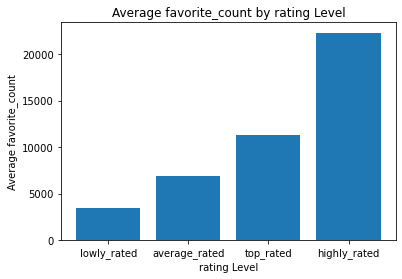

In [17]:
locations = [1, 2, 3, 4]
plt.bar(locations, df_liked, tick_label=df_liked.index)
plt.title('Average favorite_count by rating Level')
plt.xlabel('rating Level')
plt.ylabel('Average favorite_count');

it can be observed from our visualization that dogs that are highly rated happen to be most liked.

### CONCLUSIONS
From our data to answer the research questions we did exclude large amount of data from our dataset
which had no names and groups. This remaining data may not well represent the entire dataset.

#### Insights
1. Which are the most common dog names in our dataset?
- The most common dogs in our dataset are: Charlie, Oliver, Cooper and Lucy . Charlie appears
  11 times in our datasets then Oliver, Cooper and Lucy tie at second with 10 number of apperrances.
2. a. Which dog stage is most retweed on average?
- The most retweed dog stage is doggo, puppo then followed by doggo and then puppo. The most retweeted 
  beats the second by almost three times
   b.Does top retweed dog stages happen to be most liked? 
- It is generally clear that the most retweed dog stages also happen to be most liked. doggo, puppo
  leads in both.
3. Do dogs that happen to have high ratings happen to be most liked?
- There is a general trend of increasing favorite_count from lowly rated dogs to highly rated dogs.
  This indicates dogs that have high ratings, happen also to be most liked among our dog dataset.